In [19]:
import pandas as pd
import plotly.express as px


In [20]:
df = pd.read_csv("historical_automobile_sales.csv")
df.head

<bound method NDFrame.head of            Date  Year Month  Recession  Consumer_Confidence  \
0     1/31/1980  1980   Jan          1               108.24   
1     2/29/1980  1980   Feb          1                98.75   
2     3/31/1980  1980   Mar          1               107.48   
3     4/30/1980  1980   Apr          1               115.01   
4     5/31/1980  1980   May          1                98.72   
..          ...   ...   ...        ...                  ...   
523   8/31/2023  2023   Aug          0               103.36   
524   9/30/2023  2023   Sep          0               101.55   
525  10/31/2023  2023   Oct          0               124.66   
526  11/30/2023  2023   Nov          0                97.09   
527  12/31/2023  2023   Dec          0                95.92   

     Seasonality_Weight      Price  Advertising_Expenditure  Competition  \
0                  0.50  27483.571                     1558            7   
1                  0.75  24308.678                     3048  

In [21]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

In [22]:
df.info

<bound method DataFrame.info of            Date  Year Month  Recession  Consumer_Confidence  \
0     1/31/1980  1980   Jan          1               108.24   
1     2/29/1980  1980   Feb          1                98.75   
2     3/31/1980  1980   Mar          1               107.48   
3     4/30/1980  1980   Apr          1               115.01   
4     5/31/1980  1980   May          1                98.72   
..          ...   ...   ...        ...                  ...   
523   8/31/2023  2023   Aug          0               103.36   
524   9/30/2023  2023   Sep          0               101.55   
525  10/31/2023  2023   Oct          0               124.66   
526  11/30/2023  2023   Nov          0                97.09   
527  12/31/2023  2023   Dec          0                95.92   

     Seasonality_Weight      Price  Advertising_Expenditure  Competition  \
0                  0.50  27483.571                     1558            7   
1                  0.75  24308.678                     3048

In [23]:
df.isnull().sum()

Date                       0
Year                       0
Month                      0
Recession                  0
Consumer_Confidence        0
Seasonality_Weight         0
Price                      0
Advertising_Expenditure    0
Competition                0
GDP                        0
Growth_Rate                0
unemployment_rate          0
Automobile_Sales           0
Vehicle_Type               0
City                       0
dtype: int64

                                             EDA

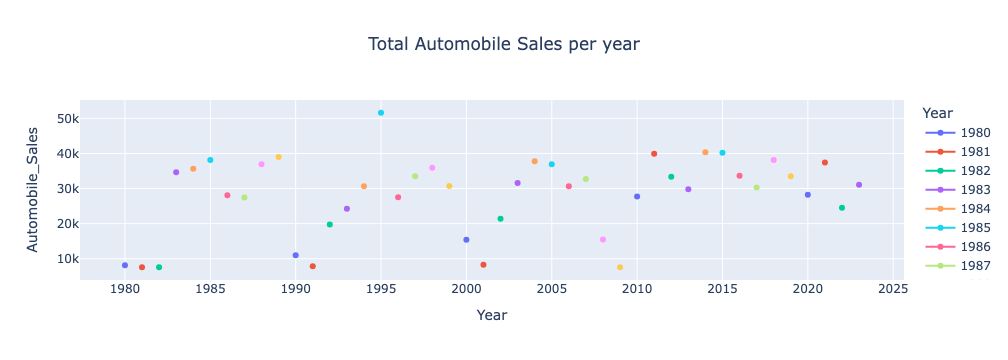

In [24]:
Yearly_sales =df.groupby("Year")["Automobile_Sales"].sum().reset_index()
fig1 =px.line(Yearly_sales,
              x="Year",
              y="Automobile_Sales",
              title="Total Automobile Sales per year",
              color="Year",
              markers="True")
fig1.update_layout(title_x=0.5)
fig1.show()

In [25]:
#general increase of sales over the years(dips indicating the recession years)

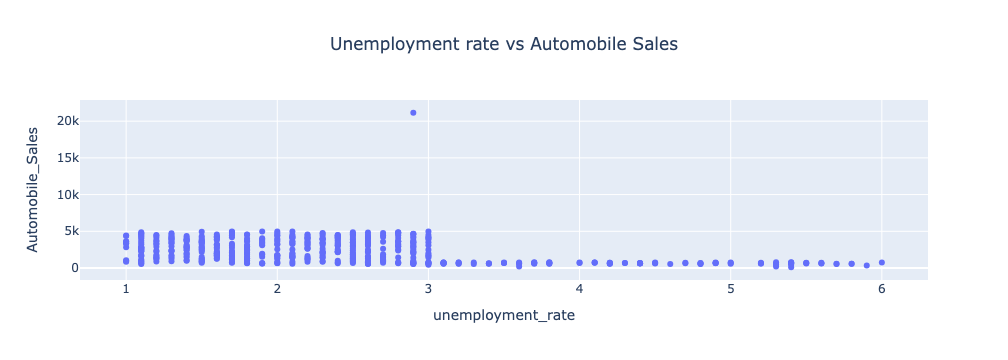

In [26]:
fig2 =px.scatter(df,
              x="unemployment_rate",
              y="Automobile_Sales",
              title="Unemployment rate vs Automobile Sales "
                )
fig2.update_layout(title_x=0.5)
fig2.show()

In [27]:
#the higher the unemployment the lower the sales
correlation = df['unemployment_rate'].corr(df['Automobile_Sales'])
print(f"Correlation: {correlation}")

Correlation: -0.39800845943349694


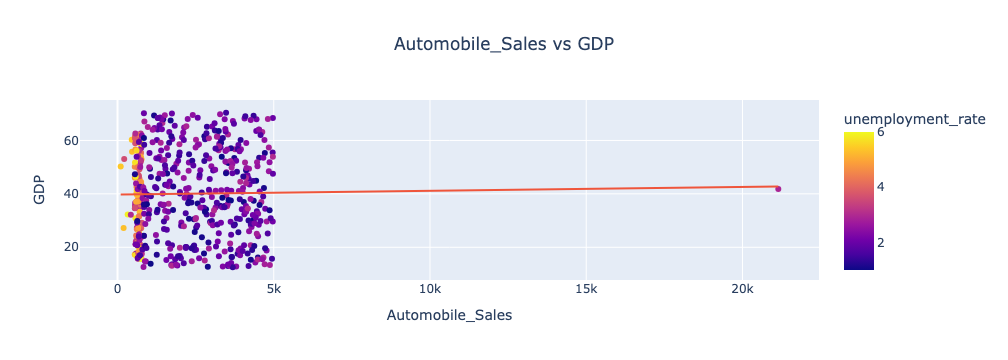

In [28]:
fig3 =px.scatter(df,
              x="Automobile_Sales",
              y="GDP",
              title="Automobile_Sales vs GDP",
                 color="unemployment_rate",
                trendline="ols"
                )
fig3.update_layout(title_x=0.5)
fig3.show()

In [29]:
#GDP mostly constant (with little variations) indicating that changes in automobile sales had little effect on GDP.

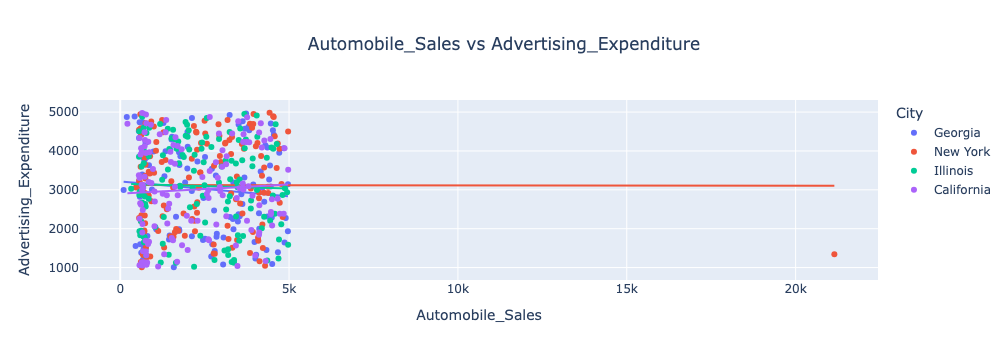

In [30]:
fig4 =px.scatter(df,
              x="Automobile_Sales",
              y="Advertising_Expenditure",
              title="Automobile_Sales vs Advertising_Expenditure",
                trendline="ols", 
                 color="City"
                )
fig4.update_layout(title_x=0.5)
fig4.show()

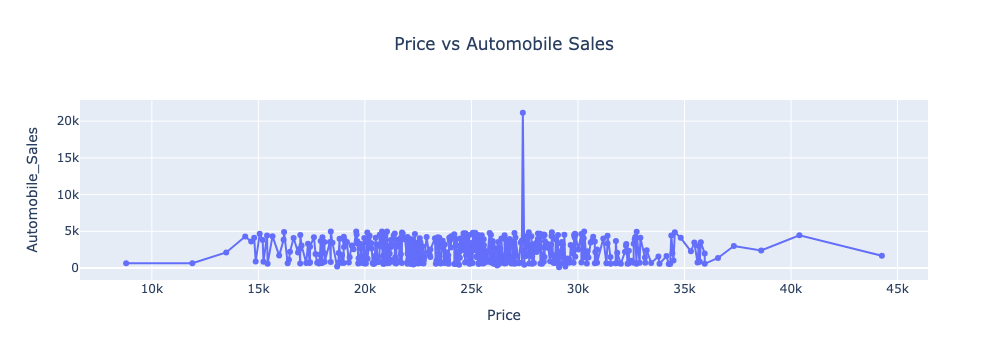

In [31]:
price_sales =df.groupby("Price")["Automobile_Sales"].median().reset_index()
fig5 =px.line(price_sales,
              x="Price",
              y="Automobile_Sales",
              title="Price vs Automobile Sales ",
              markers="True")
fig5.update_layout(title_x=0.5)
fig5.show()

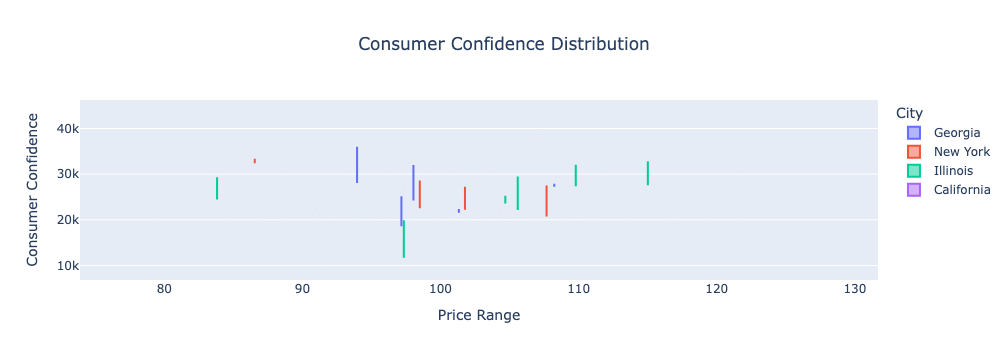

In [32]:
fig6 = px.box(df, y='Price', x='Consumer_Confidence',
             title="Consumer Confidence Distribution",
             color ="City")

fig6.update_layout(title_x=0.5, xaxis_title="Price Range", yaxis_title="Consumer Confidence")
fig6.show()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#target point
X=df[['unemployment_rate', 'Year', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition']]
y=df["Automobile_Sales"]

#train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initialization,prediction and Evaluation
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 1158362.77
R-squared: 0.45


In [34]:
import numpy as np
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

RMSE: 1076.27


In [35]:
import pickle
with open("linear_model.pkl", "wb") as file:
    pickle.dump(model,file)
print("model saved successfully")

model saved successfully
